In [1]:
#importing necessary file
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Reading train and test dataset
flight_train = pd.read_excel(r'./flight_price/Data_Train.xlsx')
flight_test = pd.read_excel(r'./flight_price/Test_set.xlsx')

# Train set EDA

In [3]:
flight_train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [4]:
#Checking the shape of the dataset
flight_train.shape

(10683, 11)

In [5]:
#Let us check for the information of the dataset
flight_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
#checking for the null values
flight_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
#Dropping the null value in the dataset
flight_train.dropna(inplace=True)

In [8]:
#checking whether the na values are dropped (or) not
flight_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [9]:
#looking for the duplicates
flight_train[flight_train.duplicated()].head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,No info,13376
1061,Air India,21/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,21h 15m,2 stops,No info,10231
1348,Air India,18/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,26h,2 stops,No info,12392
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,7303


In [10]:
#drop the duplicate values
flight_train.drop_duplicates(inplace=True,keep='first')

In [11]:
flight_train[flight_train.duplicated()].head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price


In [12]:
flight_train.shape

(10462, 11)

###### Before deleting the duplicate shape of the dataset is 10683 rows × 11 columns.after dropping the duplicates shape of the data set is  10462 rows × 11 columns

In [13]:
#Statistical measures
flight_train.describe()

,Price
count,10462.000000
mean,9026.790289
std,4624.849541
min,1759.000000
25%,5224.000000
50%,8266.000000
75%,12344.750000
max,79512.000000


In [14]:
flight_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10462 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10462 non-null  object
 1   Date_of_Journey  10462 non-null  object
 2   Source           10462 non-null  object
 3   Destination      10462 non-null  object
 4   Route            10462 non-null  object
 5   Dep_Time         10462 non-null  object
 6   Arrival_Time     10462 non-null  object
 7   Duration         10462 non-null  object
 8   Total_Stops      10462 non-null  object
 9   Additional_Info  10462 non-null  object
 10  Price            10462 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 980.8+ KB


In [15]:
#check the column name of the dataset
flight_train.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [16]:
#Date of journey,Dep_time and Arrival_time are represented as Object type.so,we need to change data type
def change_into_datetime(col):
    flight_train[col]=pd.to_datetime(flight_train[col])

In [17]:
for i in ['Date_of_Journey','Dep_Time', 'Arrival_Time']:
    change_into_datetime(i)

In [18]:
flight_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10462 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10462 non-null  object        
 1   Date_of_Journey  10462 non-null  datetime64[ns]
 2   Source           10462 non-null  object        
 3   Destination      10462 non-null  object        
 4   Route            10462 non-null  object        
 5   Dep_Time         10462 non-null  datetime64[ns]
 6   Arrival_Time     10462 non-null  datetime64[ns]
 7   Duration         10462 non-null  object        
 8   Total_Stops      10462 non-null  object        
 9   Additional_Info  10462 non-null  object        
 10  Price            10462 non-null  int64         
dtypes: datetime64[ns](3), int64(1), object(7)
memory usage: 980.8+ KB


In [19]:
flight_train['journey_day'] = flight_train['Date_of_Journey'].dt.day
flight_train['journey_month'] = flight_train['Date_of_Journey'].dt.month

In [20]:
flight_train.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2022-03-31 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-03-31 05:50:00,2022-03-31 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2022-03-31 09:25:00,2022-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2022-03-31 18:05:00,2022-03-31 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2022-03-31 16:50:00,2022-03-31 21:35:00,4h 45m,1 stop,No info,13302,3,1


In [21]:
flight_train.shape

(10462, 13)

In [22]:
flight_train.drop('Date_of_Journey',axis=1,inplace=True)

In [23]:
flight_train.shape

(10462, 12)

### visualization

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

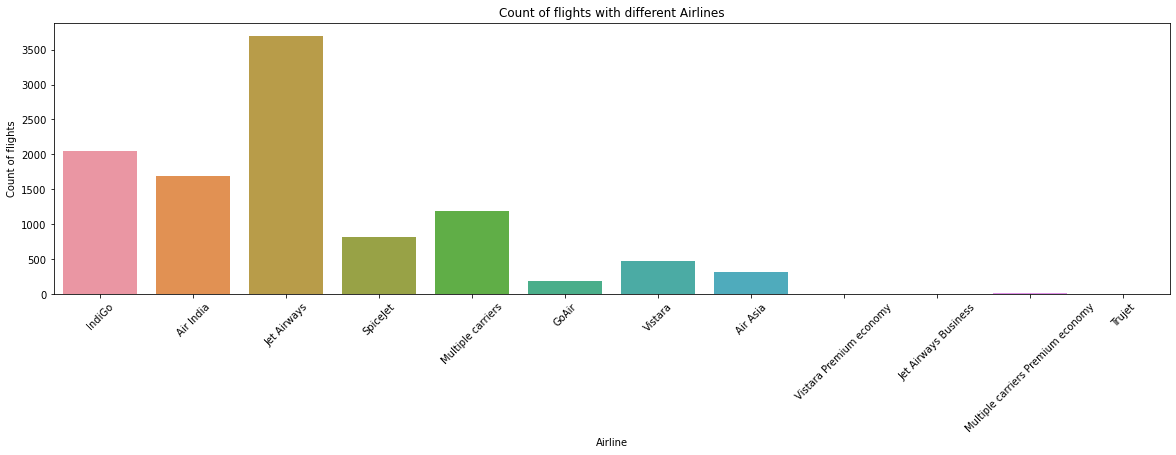

In [24]:
plt.figure(figsize = (20,5))
plt.title('Count of flights with different Airlines')
ax=sns.countplot(x = 'Airline', data =flight_train)
plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.xticks(rotation = 45)

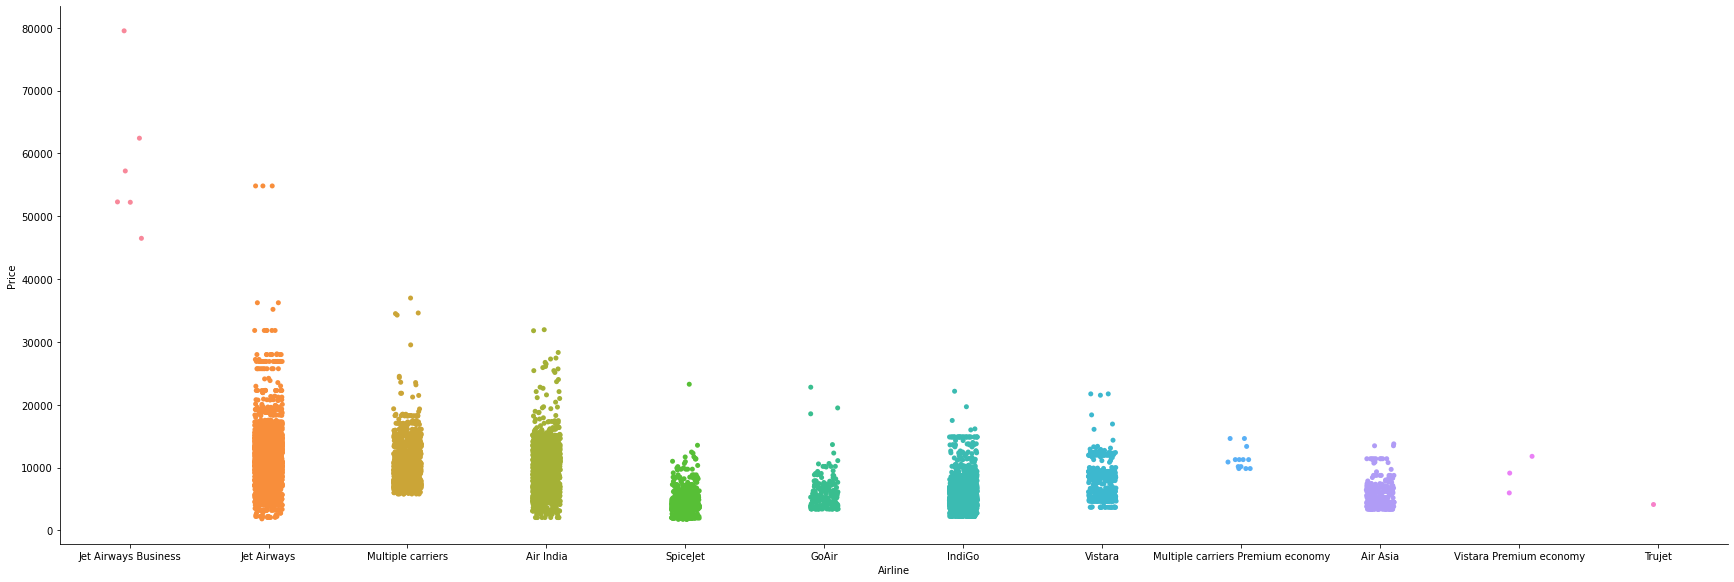

In [25]:
#Price VS Airline
sns.catplot(y = "Price", x = "Airline", data = flight_train.sort_values("Price", ascending = False), height = 8, aspect = 3)
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

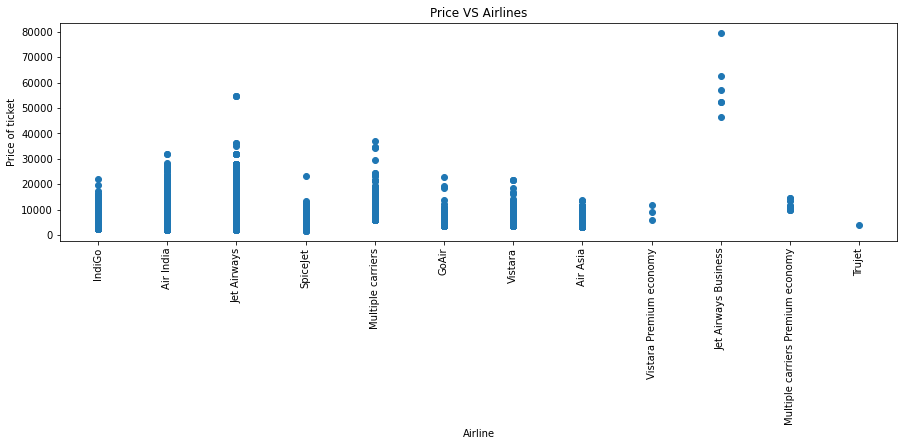

In [26]:
# Price VS Airlines using scatter plot
plt.figure(figsize = (15,4))
plt.title('Price VS Airlines')
plt.scatter(flight_train['Airline'], flight_train['Price'])
plt.xticks
plt.xlabel('Airline')
plt.ylabel('Price of ticket')
plt.xticks(rotation = 90)

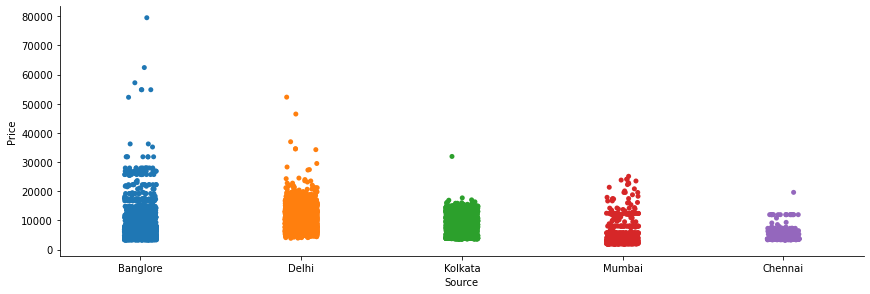

In [27]:
# Price Vs Source
sns.catplot(y = "Price", x = "Source", data = flight_train.sort_values("Price", ascending = False),height = 4, aspect = 3)
plt.show()

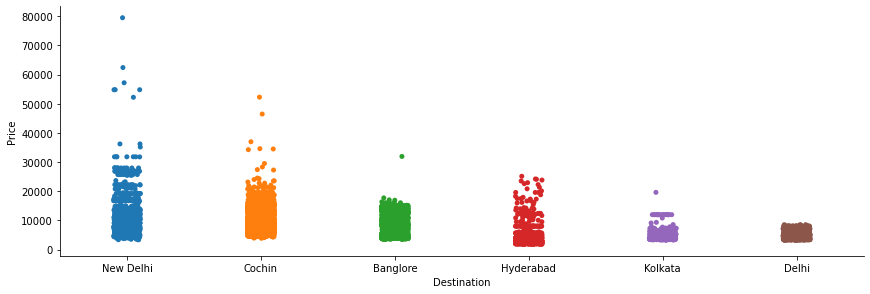

In [28]:
#Price Vs Destination
sns.catplot(y = "Price", x = "Destination", data = flight_train.sort_values("Price", ascending = False),height = 4, aspect = 3)
plt.show()

In [29]:
flight_train.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'journey_day',
       'journey_month'],
      dtype='object')

In [30]:
#Now we will exctract hour and minites using functions

def extract_hour(data,col):
    data[col+'_hour']=data[col].dt.hour
    
def extract_min(data,col):
    data[col+'_min']=data[col].dt.minute
    

def drop_col(data,col):
    data.drop(col,axis=1,inplace=True)


In [31]:
# Similar to Date_of_Journey we can extract values from Dep_Time
extract_hour(flight_train,'Dep_Time')

#extracting minutes
extract_min(flight_train,'Dep_Time')

#drop the column
drop_col(flight_train,'Dep_Time')

In [32]:
#extracting hour
extract_hour(flight_train,'Arrival_Time')

#extracting min
extract_min(flight_train,'Arrival_Time')


#drop the column
drop_col(flight_train,'Arrival_Time')

In [33]:
flight_train.head(4)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30


In [34]:
#duration

duration=list(flight_train['Duration'])

for i in range(len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]: 
             duration[i]=duration[i] + ' 0m' 
        else:
             duration[i]='0h '+ duration[i]

In [35]:
flight_train['Duration'] = duration

In [36]:
def hour(x):
    return x.split(' ')[0][0:-1]

def minutes(x):
    return x.split(' ')[1][0:-1]

In [37]:
flight_train['dur_hour']= flight_train['Duration'].apply(hour)
flight_train['dur_min']= flight_train['Duration'].apply(minutes)


In [38]:
flight_train.head(4)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,dur_hour,dur_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30,5,25


In [39]:
flight_train.drop('Duration',axis=1,inplace=True)

In [40]:
flight_train.shape

(10462, 15)

In [41]:
flight_train.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Price', 'journey_day', 'journey_month',
       'Dep_Time_hour', 'Dep_Time_min', 'Arrival_Time_hour',
       'Arrival_Time_min', 'dur_hour', 'dur_min'],
      dtype='object')

In [42]:
flight_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10462 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline            10462 non-null  object
 1   Source             10462 non-null  object
 2   Destination        10462 non-null  object
 3   Route              10462 non-null  object
 4   Total_Stops        10462 non-null  object
 5   Additional_Info    10462 non-null  object
 6   Price              10462 non-null  int64 
 7   journey_day        10462 non-null  int64 
 8   journey_month      10462 non-null  int64 
 9   Dep_Time_hour      10462 non-null  int64 
 10  Dep_Time_min       10462 non-null  int64 
 11  Arrival_Time_hour  10462 non-null  int64 
 12  Arrival_Time_min   10462 non-null  int64 
 13  dur_hour           10462 non-null  object
 14  dur_min            10462 non-null  object
dtypes: int64(7), object(8)
memory usage: 1.5+ MB


In [43]:
flight_train['dur_hour'] = flight_train['dur_hour'].astype(int)
flight_train['dur_min'] = flight_train['dur_min'].astype(int)

In [44]:
flight_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10462 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline            10462 non-null  object
 1   Source             10462 non-null  object
 2   Destination        10462 non-null  object
 3   Route              10462 non-null  object
 4   Total_Stops        10462 non-null  object
 5   Additional_Info    10462 non-null  object
 6   Price              10462 non-null  int64 
 7   journey_day        10462 non-null  int64 
 8   journey_month      10462 non-null  int64 
 9   Dep_Time_hour      10462 non-null  int64 
 10  Dep_Time_min       10462 non-null  int64 
 11  Arrival_Time_hour  10462 non-null  int64 
 12  Arrival_Time_min   10462 non-null  int64 
 13  dur_hour           10462 non-null  int32 
 14  dur_min            10462 non-null  int32 
dtypes: int32(2), int64(7), object(6)
memory usage: 1.4+ MB


In [45]:
#finding the categorical values

col = []
for column in flight_train.columns:
    if flight_train[column].dtype=='object':
        col.append(column)
col    

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [46]:
#finding the continues data
cont = []
for column in flight_train.columns:
    if flight_train[column].dtype !='object':
        cont.append(column)
cont


['Price',
 'journey_day',
 'journey_month',
 'Dep_Time_hour',
 'Dep_Time_min',
 'Arrival_Time_hour',
 'Arrival_Time_min',
 'dur_hour',
 'dur_min']

In [47]:
# Handling categorical data
categorical = flight_train[col]
categorical

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info
...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info


In [48]:
categorical['Airline'].value_counts()

Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [49]:
categorical['Route'].value_counts()

DEL → BOM → COK                2376
BLR → DEL                      1536
CCU → BOM → BLR                 979
CCU → BLR                       724
BOM → HYD                       621
                               ... 
BLR → HBX → BOM → NAG → DEL       1
BOM → VNS → DEL → HYD             1
BOM → JLR → HYD                   1
BOM → GOI → HYD                   1
BOM → BBI → HYD                   1
Name: Route, Length: 128, dtype: int64

In [50]:
categorical['Route1']=categorical['Route'].str.split('→').str[0]
categorical['Route2']=categorical['Route'].str.split('→').str[1]
categorical['Route3']=categorical['Route'].str.split('→').str[2]
categorical['Route4']=categorical['Route'].str.split('→').str[3]
categorical['Route5']=categorical['Route'].str.split('→').str[4]

In [51]:
categorical.drop('Route',axis=1,inplace=True)
categorical.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,1 stop,No info,BLR,NAG,DEL,NaN,NaN


In [52]:
categorical.isnull().sum()

Airline                0
Source                 0
Destination            0
Total_Stops            0
Additional_Info        0
Route1                 0
Route2                 0
Route3              3475
Route4              9100
Route5             10418
dtype: int64

In [53]:
for i in ['Route3', 'Route4', 'Route5']:
    categorical[i].fillna('None',inplace=True)

In [54]:
categorical.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Route1             0
Route2             0
Route3             0
Route4             0
Route5             0
dtype: int64

In [55]:
# Applying label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in ['Route1', 'Route2', 'Route3', 'Route4', 'Route5']:
    categorical[i]=le.fit_transform(categorical[i])
categorical

,Airline,Source,Destination,Total_Stops,Additional_Info,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,non-stop,No info,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,No info,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,No info,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,No info,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1 stop,No info,0,34,8,13,5
...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,non-stop,No info,2,5,29,13,5
10679,Air India,Kolkata,Banglore,non-stop,No info,2,5,29,13,5
10680,Jet Airways,Banglore,Delhi,non-stop,No info,0,13,29,13,5
10681,Vistara,Banglore,New Delhi,non-stop,No info,0,13,29,13,5


In [56]:
#Additional_info
categorical['Additional_Info'].value_counts()

No info                         8182
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
2 Long layover                     1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

In [57]:
# For our price prediction we 'Additional_info' is not that much useful that why im going to drop this column from dataset
categorical.drop('Additional_Info',axis=1,inplace=True)

In [58]:
categorical.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Route1', 'Route2',
       'Route3', 'Route4', 'Route5'],
      dtype='object')

In [59]:
#Next we will look at 'Total_Stops'
categorical['Total_Stops'].value_counts()


1 stop      5625
non-stop    3475
2 stops     1318
3 stops       43
4 stops        1
Name: Total_Stops, dtype: int64

In [60]:
#LabelEncoding
categorical['Total_Stops'] = le.fit_transform(categorical['Total_Stops'])
categorical['Total_Stops']

0        4
1        1
2        1
3        0
4        0
        ..
10678    4
10679    4
10680    4
10681    4
10682    1
Name: Total_Stops, Length: 10462, dtype: int32

In [61]:
categorical.head(4)

,Airline,Source,Destination,Total_Stops,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,4,0,13,29,13,5
1,Air India,Kolkata,Banglore,1,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,1,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,0,2,34,3,13,5


In [62]:
#Appling onehot encoding on 'Airline' column
Airline = pd.get_dummies(categorical['Airline'],drop_first=True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [63]:
categorical['Airline'] = Airline
categorical.head(4)

,Airline,Source,Destination,Total_Stops,Route1,Route2,Route3,Route4,Route5
0,0,Banglore,New Delhi,4,0,13,29,13,5
1,1,Kolkata,Banglore,1,2,25,1,3,5
2,0,Delhi,Cochin,1,3,32,4,5,5
3,0,Kolkata,Banglore,0,2,34,3,13,5


In [64]:
# One hot encoding for 'Source'
Source = pd.get_dummies(categorical['Source'],drop_first=True)
Source.head()


,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [65]:
categorical['Source']= Source
categorical.head(4)

,Airline,Source,Destination,Total_Stops,Route1,Route2,Route3,Route4,Route5
0,0,0,New Delhi,4,0,13,29,13,5
1,1,0,Banglore,1,2,25,1,3,5
2,0,0,Cochin,1,3,32,4,5,5
3,0,0,Banglore,0,2,34,3,13,5


In [66]:
# One hot encoding 'Destination'
Destination = pd.get_dummies(categorical['Destination'],drop_first=True)
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [67]:
categorical['Destination'] = Destination
categorical.head(4)

,Airline,Source,Destination,Total_Stops,Route1,Route2,Route3,Route4,Route5
0,0,0,0,4,0,13,29,13,5
1,1,0,0,1,2,25,1,3,5
2,0,0,1,1,3,32,4,5,5
3,0,0,0,0,2,34,3,13,5


In [68]:
#concatinate the categorical and continuoes variable
flight_tr = pd.concat([categorical,flight_train[cont]],axis=1)

In [69]:
flight_tr.head()

,Airline,Source,Destination,Total_Stops,Route1,Route2,Route3,Route4,Route5,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,dur_hour,dur_min
0,0,0,0,4,0,13,29,13,5,3897,24,3,22,20,1,10,2,50
1,1,0,0,1,2,25,1,3,5,7662,5,1,5,50,13,15,7,25
2,0,0,1,1,3,32,4,5,5,13882,6,9,9,25,4,25,19,0
3,0,0,0,0,2,34,3,13,5,6218,5,12,18,5,23,30,5,25
4,0,0,0,0,0,34,8,13,5,13302,3,1,16,50,21,35,4,45


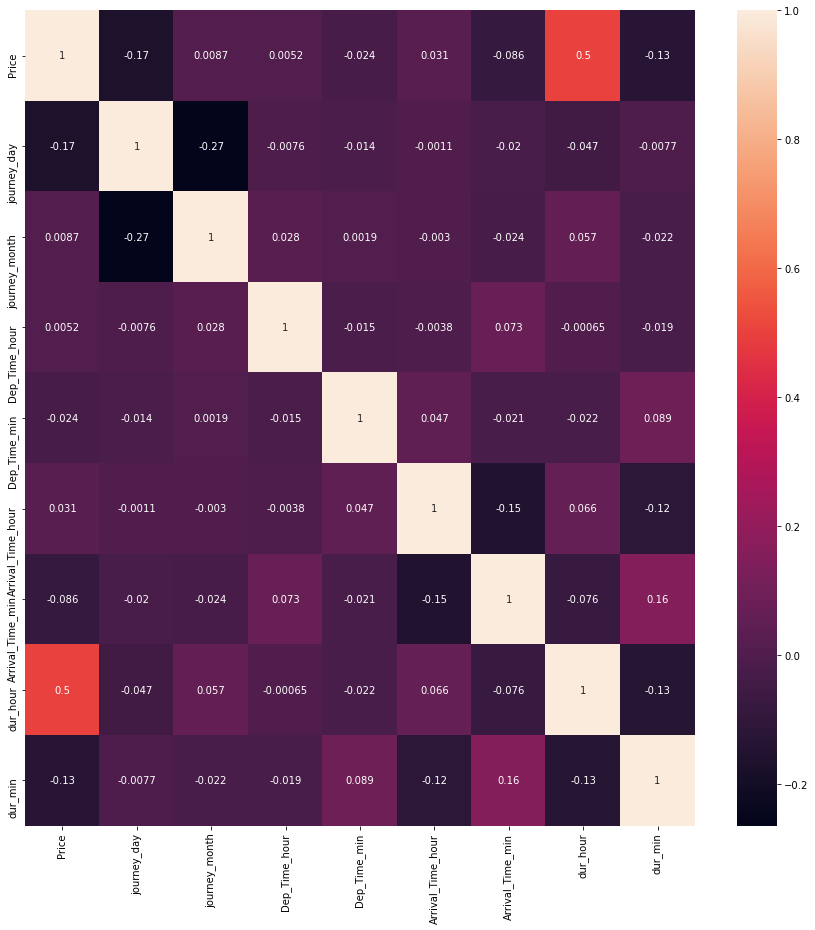

In [70]:
#correlation matrics for train data
plt.figure(figsize = (15,15))
sns.heatmap(flight_train.corr(), annot = True)
plt.show()

# Test set EDA

In [71]:
flight_test.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [72]:
flight_test.shape

(2671, 10)

In [73]:
flight_test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [74]:
flight_test.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [75]:
flight_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [76]:
#Date of journey,Dep_time and Arrival_time are represented as Object type.so,we need to change data type
def change_into_datetime(col):
    flight_test[col]=pd.to_datetime(flight_test[col])

In [77]:
for i in ['Date_of_Journey','Dep_Time', 'Arrival_Time']:
    change_into_datetime(i)
flight_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          2671 non-null   object        
 1   Date_of_Journey  2671 non-null   datetime64[ns]
 2   Source           2671 non-null   object        
 3   Destination      2671 non-null   object        
 4   Route            2671 non-null   object        
 5   Dep_Time         2671 non-null   datetime64[ns]
 6   Arrival_Time     2671 non-null   datetime64[ns]
 7   Duration         2671 non-null   object        
 8   Total_Stops      2671 non-null   object        
 9   Additional_Info  2671 non-null   object        
dtypes: datetime64[ns](3), object(7)
memory usage: 208.8+ KB


In [78]:
flight_test['journey_day'] = flight_test['Date_of_Journey'].dt.day
flight_test['journey_month'] = flight_test['Date_of_Journey'].dt.month


In [79]:
flight_test.drop('Date_of_Journey',axis=1,inplace=True)
flight_test.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,journey_day,journey_month
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,2022-03-31 17:30:00,2022-06-07 04:25:00,10h 55m,1 stop,No info,6,6
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,2022-03-31 06:20:00,2022-03-31 10:20:00,4h,1 stop,No info,5,12
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,2022-03-31 19:15:00,2022-05-22 19:00:00,23h 45m,1 stop,In-flight meal not included,21,5
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,2022-03-31 08:00:00,2022-03-31 21:00:00,13h,1 stop,No info,21,5
4,Air Asia,Banglore,Delhi,BLR → DEL,2022-03-31 23:55:00,2022-06-25 02:45:00,2h 50m,non-stop,No info,24,6


In [80]:
#Now we will exctract hour and minites using functions

def extract_hour(data,col):
    data[col+'_hour']=data[col].dt.hour
    
def extract_min(data,col):
    data[col+'_min']=data[col].dt.minute
    

def drop_col(data,col):
    data.drop(col,axis=1,inplace=True)


In [81]:
# Similar to Date_of_Journey we can extract values from Dep_Time
extract_hour(flight_test,'Dep_Time')

#extracting minutes
extract_min(flight_test,'Dep_Time')

#drop the column
drop_col(flight_test,'Dep_Time')

In [82]:
#extracting hour
extract_hour(flight_test,'Arrival_Time')

#extracting min
extract_min(flight_test,'Arrival_Time')


#drop the column
drop_col(flight_test,'Arrival_Time')

In [83]:
flight_test.head(4)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,5,12,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop,In-flight meal not included,21,5,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1 stop,No info,21,5,8,0,21,0


In [84]:
#duration

duration=list(flight_test['Duration'])

for i in range(len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]: 
             duration[i]=duration[i] + ' 0m' 
        else:
             duration[i]='0h '+ duration[i]

In [85]:
flight_test['Duration'] = duration

In [86]:
def hour(x):
    return x.split(' ')[0][0:-1]

def minutes(x):
    return x.split(' ')[1][0:-1]

In [87]:
flight_test['dur_hour']= flight_test['Duration'].apply(hour)
flight_test['dur_min']= flight_test['Duration'].apply(minutes)


In [88]:
flight_test.drop('Duration',axis=1,inplace=True)

In [89]:
flight_test['dur_hour'] = flight_test['dur_hour'].astype(int)
flight_test['dur_min'] = flight_test['dur_min'].astype(int)

In [90]:
flight_test.head(4)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,dur_hour,dur_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,5,12,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,21,5,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,21,5,8,0,21,0,13,0


In [91]:
flight_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline            2671 non-null   object
 1   Source             2671 non-null   object
 2   Destination        2671 non-null   object
 3   Route              2671 non-null   object
 4   Total_Stops        2671 non-null   object
 5   Additional_Info    2671 non-null   object
 6   journey_day        2671 non-null   int64 
 7   journey_month      2671 non-null   int64 
 8   Dep_Time_hour      2671 non-null   int64 
 9   Dep_Time_min       2671 non-null   int64 
 10  Arrival_Time_hour  2671 non-null   int64 
 11  Arrival_Time_min   2671 non-null   int64 
 12  dur_hour           2671 non-null   int32 
 13  dur_min            2671 non-null   int32 
dtypes: int32(2), int64(6), object(6)
memory usage: 271.4+ KB


In [92]:
#finding the categorical values

col = []
for column in flight_train.columns:
    if flight_train[column].dtype=='object':
        col.append(column)
col

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [93]:
#finding the continues data
conti = []
for column in flight_test.columns:
    if flight_test[column].dtype !='object':
        conti.append(column)
conti


['journey_day',
 'journey_month',
 'Dep_Time_hour',
 'Dep_Time_min',
 'Arrival_Time_hour',
 'Arrival_Time_min',
 'dur_hour',
 'dur_min']

In [94]:
# Handling categorical data
categ = flight_train[col]
categ

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info
...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info


In [95]:
categ['Route1']=categ['Route'].str.split('→').str[0]
categ['Route2']=categ['Route'].str.split('→').str[1]
categ['Route3']=categ['Route'].str.split('→').str[2]
categ['Route4']=categ['Route'].str.split('→').str[3]
categ['Route5']=categ['Route'].str.split('→').str[4]

In [96]:
categ.drop('Route',axis=1,inplace=True)
categ.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,1 stop,No info,BLR,NAG,DEL,NaN,NaN


In [97]:
categ.isnull().sum()

Airline                0
Source                 0
Destination            0
Total_Stops            0
Additional_Info        0
Route1                 0
Route2                 0
Route3              3475
Route4              9100
Route5             10418
dtype: int64

In [98]:
for i in ['Route3', 'Route4', 'Route5']:
    categ[i].fillna('None',inplace=True)

In [99]:
categ.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Route1             0
Route2             0
Route3             0
Route4             0
Route5             0
dtype: int64

In [100]:
# Applying label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in ['Route1', 'Route2', 'Route3', 'Route4', 'Route5']:
    categ[i]=le.fit_transform(categ[i])
categ

,Airline,Source,Destination,Total_Stops,Additional_Info,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,non-stop,No info,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,No info,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,No info,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,No info,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1 stop,No info,0,34,8,13,5
...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,non-stop,No info,2,5,29,13,5
10679,Air India,Kolkata,Banglore,non-stop,No info,2,5,29,13,5
10680,Jet Airways,Banglore,Delhi,non-stop,No info,0,13,29,13,5
10681,Vistara,Banglore,New Delhi,non-stop,No info,0,13,29,13,5


In [101]:
#Additional_info
categ['Additional_Info'].value_counts()

No info                         8182
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
2 Long layover                     1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

In [102]:
# For our price prediction we 'Additional_info' is not that much useful that why im going to drop this column from dataset
categ.drop('Additional_Info',axis=1,inplace=True)

In [103]:
#LabelEncoding
categ['Total_Stops'] = le.fit_transform(categ['Total_Stops'])
categ['Total_Stops']

0        4
1        1
2        1
3        0
4        0
        ..
10678    4
10679    4
10680    4
10681    4
10682    1
Name: Total_Stops, Length: 10462, dtype: int32

In [104]:
#Appling onehot encoding on 'Airline' column
Airline = pd.get_dummies(categ['Airline'],drop_first=True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [105]:
categ['Airline'] = Airline
categ.head(4)

,Airline,Source,Destination,Total_Stops,Route1,Route2,Route3,Route4,Route5
0,0,Banglore,New Delhi,4,0,13,29,13,5
1,1,Kolkata,Banglore,1,2,25,1,3,5
2,0,Delhi,Cochin,1,3,32,4,5,5
3,0,Kolkata,Banglore,0,2,34,3,13,5


In [106]:
# One hot encoding for 'Source'
Source = pd.get_dummies(categ['Source'],drop_first=True)
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [107]:
categ['Source']= Source
categ.head(4)

,Airline,Source,Destination,Total_Stops,Route1,Route2,Route3,Route4,Route5
0,0,0,New Delhi,4,0,13,29,13,5
1,1,0,Banglore,1,2,25,1,3,5
2,0,0,Cochin,1,3,32,4,5,5
3,0,0,Banglore,0,2,34,3,13,5


In [108]:
# One hot encoding 'Destination'
Destination = pd.get_dummies(categ['Destination'],drop_first=True)
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [109]:
categ['Destination'] = Destination
categ.head(4)

,Airline,Source,Destination,Total_Stops,Route1,Route2,Route3,Route4,Route5
0,0,0,0,4,0,13,29,13,5
1,1,0,0,1,2,25,1,3,5
2,0,0,1,1,3,32,4,5,5
3,0,0,0,0,2,34,3,13,5


In [110]:
#concatinate the categorical and continuoes variable
f_test = pd.concat([categ,flight_test[conti]],axis=1)

In [111]:
f_test.head(4)

,Airline,Source,Destination,Total_Stops,Route1,Route2,Route3,Route4,Route5,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,dur_hour,dur_min
0,0.0,0.0,0.0,4.0,0.0,13.0,29.0,13.0,5.0,6.0,6.0,17.0,30.0,4.0,25.0,10.0,55.0
1,1.0,0.0,0.0,1.0,2.0,25.0,1.0,3.0,5.0,5.0,12.0,6.0,20.0,10.0,20.0,4.0,0.0
2,0.0,0.0,1.0,1.0,3.0,32.0,4.0,5.0,5.0,21.0,5.0,19.0,15.0,19.0,0.0,23.0,45.0
3,0.0,0.0,0.0,0.0,2.0,34.0,3.0,13.0,5.0,21.0,5.0,8.0,0.0,21.0,0.0,13.0,0.0


# DataScaling

In [112]:
flight_tr.head()

,Airline,Source,Destination,Total_Stops,Route1,Route2,Route3,Route4,Route5,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,dur_hour,dur_min
0,0,0,0,4,0,13,29,13,5,3897,24,3,22,20,1,10,2,50
1,1,0,0,1,2,25,1,3,5,7662,5,1,5,50,13,15,7,25
2,0,0,1,1,3,32,4,5,5,13882,6,9,9,25,4,25,19,0
3,0,0,0,0,2,34,3,13,5,6218,5,12,18,5,23,30,5,25
4,0,0,0,0,0,34,8,13,5,13302,3,1,16,50,21,35,4,45


In [125]:
flight_tr.drop('Price',axis=1,inplace=True)

In [126]:
x = flight_tr

In [127]:
x

,Airline,Source,Destination,Total_Stops,Route1,Route2,Route3,Route4,Route5,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,dur_hour,dur_min
0,0,0,0,4,0,13,29,13,5,24,3,22,20,1,10,2,50
1,1,0,0,1,2,25,1,3,5,5,1,5,50,13,15,7,25
2,0,0,1,1,3,32,4,5,5,6,9,9,25,4,25,19,0
3,0,0,0,0,2,34,3,13,5,5,12,18,5,23,30,5,25
4,0,0,0,0,0,34,8,13,5,3,1,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,0,0,4,2,5,29,13,5,4,9,19,55,22,25,2,30
10679,1,0,0,4,2,5,29,13,5,27,4,20,45,23,20,2,35
10680,0,0,0,4,0,13,29,13,5,27,4,8,20,11,20,3,0
10681,0,0,0,4,0,13,29,13,5,3,1,11,30,14,10,2,40


In [128]:
y = flight_train['Price']
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10462, dtype: int64

In [129]:
from sklearn.preprocessing import MinMaxScaler

mms =MinMaxScaler()
x_scaled = mms.fit_transform(x)
x_scaled

array([[0.        , 0.        , 0.        , ..., 0.18181818, 0.04255319,
        0.90909091],
       [1.        , 0.        , 0.        , ..., 0.27272727, 0.14893617,
        0.45454545],
       [0.        , 0.        , 1.        , ..., 0.45454545, 0.40425532,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.36363636, 0.06382979,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.18181818, 0.04255319,
        0.72727273],
       [1.        , 0.        , 1.        , ..., 0.27272727, 0.17021277,
        0.36363636]])

In [130]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif['feature'] = x.columns

vif

,vif,feature
0,1.540970,Airline
1,2.232321,Source
2,5.675113,Destination
3,36.489695,Total_Stops
4,15.560828,Route1
5,3.561927,Route2
6,55.289101,Route3
7,37.441685,Route4
8,76.371522,Route5
9,2.433445,journey_day


## Building model

In [131]:
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,cross_val_score

x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2)

In [132]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import  RandomForestRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV,LassoCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [137]:
#RandomForest Regressor
rf = RandomForestRegressor(criterion = 'mse',max_features='log2')
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_r = rf.predict(x_test)

rfs = r2_score(y_test,pred_r)
print('R2score',rfs*100)
print('\n')
print("Mean_absolute_error:",mean_absolute_error(y_test,pred_r))
print("mean_squared_error",mean_squared_error(y_test,pred_r))
print('RMSE:\n', np.sqrt(mean_squared_error(y_test, pred_r)))

cv_score  = cross_val_score(rf,x,y,cv=10)
cv_mean = cv_score.mean()
print("CrossValidation Score:",cv_mean)

R2score 78.67560104707266


Mean_absolute_error: 1361.9525384642961
mean_squared_error 4571904.854040316
RMSE: 2138.2013127954806
CrossValidation Score: 0.775887198404835


In [138]:
#LinearRegression 
lr = LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
pred_lr = lr.predict(x_test)

rfs = r2_score(y_test,pred_lr)
print('R2score',rfs*100)
print('\n')
print("Mean_absolute_error:",mean_absolute_error(y_test,pred_lr))
print("mean_squared_error",mean_squared_error(y_test,pred_lr))
print('RMSE:', np.sqrt(mean_squared_error(y_test, pred_lr)))

cv_score  = cross_val_score(lr,x,y,cv=10)
cv_mean = cv_score.mean()
print("\n CrossValidation Score:",cv_mean)

R2score 47.137537213452006


Mean_absolute_error: 2316.9454017022176
mean_squared_error 11333597.291245906
RMSE: 3366.540849484216

 CrossValidation Score: 0.4822332487369557


In [139]:
#DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
dt.score(x_train,y_train)
pred_dt = dt.predict(x_test)

rfs = r2_score(y_test,pred_dt)
print('R2score',rfs*100)
print('\n')
print("Mean_absolute_error:",mean_absolute_error(y_test,pred_dt))
print("mean_squared_error",mean_squared_error(y_test,pred_dt))
print('RMSE:', np.sqrt(mean_squared_error(y_test, pred_dt)))

cv_score  = cross_val_score(dt,x,y,cv=10)
cv_mean = cv_score.mean()
print("\nCrossValidation Score:",cv_mean)

R2score 62.978131352583574


Mean_absolute_error: 1525.1436534480013
mean_squared_error 7937408.287492701
RMSE: 2817.340641011076

CrossValidation Score: 0.619722766693281


#### Accuracy Score for RandomForestRegressor is:78%  and crossvalidation_Score:77%
#### Accuracy Score for LinearRegression is: 47% and crossvalidation_Score:48%
####  Accuracy Score for DecisionTreeRegressor is:62%  and crossvalidation_Score:61%
### I will go for RandomForestRegressor.Because it giving me the best result compared to the remaining

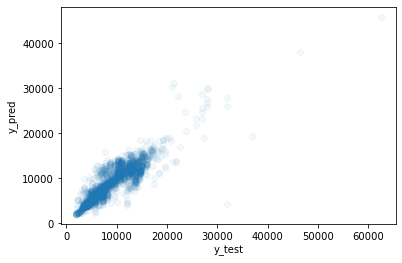

In [141]:
plt.scatter(y_test, pred_r, alpha = 0.05)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [142]:
#saving the model
import joblib
joblib.dump(rf,"flight_price.pkl")

['flight_price.pkl']